In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
pd.options.display.float_format = '{:20,.2f}'.format
import numpy as np

In [ ]:
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [ ]:
df = pd.read_excel('/content/AdventureWorks.xlsx')

In [ ]:
df.tail(2)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
902,2008-12-17,2008-12-21,306,1226,19060,200812174CS676,330.99,999.00,6,"1,198.80","4,795.20",Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black
903,2008-12-21,2008-12-25,306,1155,19060,200812214CS676,324.69,980.00,6,"1,176.00","4,704.00",Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black


In [ ]:
receita_total_da_amostra = df['Valor Venda'].sum()
print(f"Receita total em reais, entre o mês {df['Data Venda'].min().month} de {df['Data Venda'].min().year} e {df['Data Venda'].max().month} de {df['Data Venda'].max().year}: R$ {receita_total_da_amostra:.2f}")

Receita total em reais, entre o mês 1 de 2008 e 12 de 2009: R$ 5984606.14


In [ ]:
df['Custo Total'] = df['Custo Unitário'] * df['Quantidade']
custo_total_da_amostra = df['Custo Total'].sum()
print(f"Custo total em reais, entre o mês {df['Data Venda'].min().month} de {df['Data Venda'].min().year} e {df['Data Venda'].max().month} de {df['Data Venda'].max().year}: R$ {custo_total_da_amostra:.2f}")

Custo total em reais, entre o mês 1 de 2008 e 12 de 2009: R$ 2486783.05


In [ ]:
df['Lucro'] = df['Valor Venda'] - df['Custo Total'] - df['Valor Desconto']
lucro_total_da_amostra = df['Lucro'].sum()
print(f"Lucro total em reais, entre as vendas do mês {df['Data Venda'].min().month} de {df['Data Venda'].min().year} e {df['Data Venda'].max().month} de {df['Data Venda'].max().year}: R$ {lucro_total_da_amostra:.2f}")

Lucro total em reais, entre as vendas do mês 1 de 2008 e 12 de 2009: R$ 2874855.64


In [ ]:
# Limpeza do df, relação lucro/dia
df_lucro_dia = df[['Data Venda', 'Custo Unitário', 'Preço Unitário', 'Quantidade', 'Valor Desconto', 'Custo Total', 'Valor Venda', 'Lucro']]
df_lucro_dia.tail()

,Data Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Custo Total,Valor Venda,Lucro
899,2008-03-22,330.99,999.00,6,419.58,"1,985.94","5,574.42","3,168.90"
900,2008-10-04,324.69,980.00,6,"1,176.00","1,948.14","4,704.00","1,579.86"
901,2008-12-11,324.69,980.00,6,"1,176.00","1,948.14","4,704.00","1,579.86"
902,2008-12-17,330.99,999.00,6,"1,198.80","1,985.94","4,795.20","1,610.46"
903,2008-12-21,324.69,980.00,6,"1,176.00","1,948.14","4,704.00","1,579.86"


In [ ]:
print('Lucro anual total')
df_lucro_dia.groupby(df_lucro_dia['Data Venda'].dt.year)['Lucro'].sum()

Lucro anual total


Data Venda
2008           1,627,643.69
2009           1,247,211.94
Name: Lucro, dtype: float64

In [ ]:
df_produto_lucro = df[['Produto', 'Quantidade', 'Custo Unitário', 'Preço Unitário', 'Valor Desconto', 'Lucro']]
df_produto_lucro['Produto'].unique()

array(['Adventure Works Laptop15.4W M1548 Red',
       "Fabrikam Trendsetter 1/3'' 8.5mm X200 White",
       "Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey",
       "Fabrikam Trendsetter 2/3'' 17mm X100 Grey",
       "Fabrikam Trendsetter 2/3'' 17mm X100 Black",
       "Fabrikam Trendsetter 1/3'' 8.5mm X200 Black",
       'Adventure Works Laptop15.4W M1548 Black',
       'Headphone Adapter for Contoso Phone E130 Silver',
       'Headphone Adapter for Contoso Phone E130 White'], dtype=object)

In [ ]:
print('Lucro por produto')
df_produto_lucro.groupby(df_produto_lucro['Produto'])['Lucro'].sum().sort_values(ascending=False)

Lucro por produto


Produto
Fabrikam Trendsetter 2/3'' 17mm X100 Grey                   503,875.97
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey                  439,950.70
Fabrikam Trendsetter 2/3'' 17mm X100 Black                  434,650.66
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black                 423,907.62
Fabrikam Trendsetter 1/3'' 8.5mm X200 White                 379,745.42
Adventure Works Laptop15.4W M1548 Black                     288,512.74
Adventure Works Laptop15.4W M1548 Red                       261,038.62
Headphone Adapter for Contoso Phone E130 Silver              72,684.20
Headphone Adapter for Contoso Phone E130 White               70,489.70
Name: Lucro, dtype: float64

In [ ]:
print('Quantidade de produtos vendidos')
df_produto_lucro.groupby(df_produto_lucro['Produto'])['Quantidade'].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

Os **2 produtos** mais vendidos foram os que **menos** deram **lucro**. 

Enquanto que o **3º mais vendido** apresentou praticamente 4 vezes o lucro do 1º.

**4º mais vendido** foi o produto que apresentou mais lucro para a empresa quase 7 vezes mais lucro que o 1º.

Analisandoo desempenho de vendas do decorrer de cada ano.

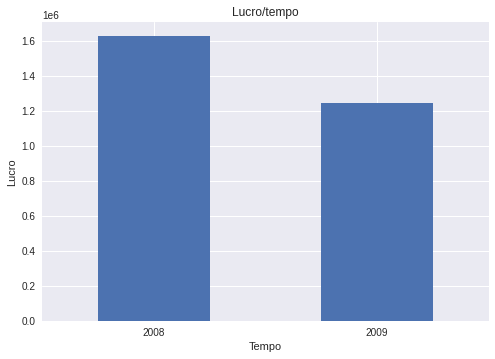

In [ ]:
df_lucro_dia.groupby(df_lucro_dia['Data Venda'].dt.year)["Lucro"].sum().plot.bar(title="Lucro/tempo")
plt.xlabel("Ano")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

In [ ]:
print('Quantidade de produtos por ano')
df.groupby(['Produto', df['Data Venda'].dt.year])['Quantidade'].sum()

Produto                                          Data Venda
Adventure Works Laptop15.4W M1548 Black          2008            456
                                                 2009            633
Adventure Works Laptop15.4W M1548 Red            2008            452
                                                 2009            595
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black      2008            582
                                                 2009            302
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey       2008            548
                                                 2009            297
Fabrikam Trendsetter 1/3'' 8.5mm X200 White      2008            394
                                                 2009            395
Fabrikam Trendsetter 2/3'' 17mm X100 Black       2008            517
                                                 2009            409
Fabrikam Trendsetter 2/3'' 17mm X100 Grey        2008            630
                                           

Lucro por produto


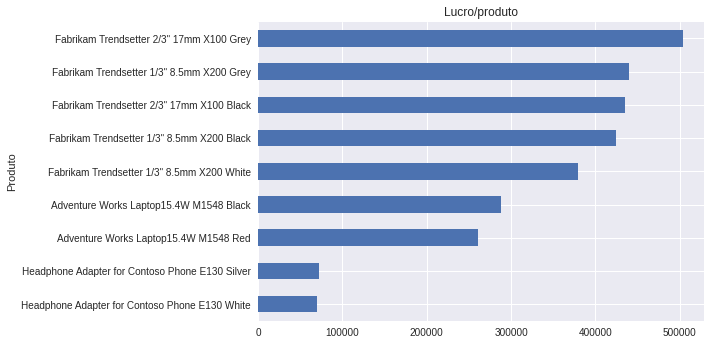

In [ ]:
df_produto_lucro.groupby(df_produto_lucro['Produto'])['Lucro'].sum().sort_values(ascending=True).plot.barh(title = 'Lucro/produto')
plt.xlabel = ('Lucro')
plt.ylabel = ('Produto');

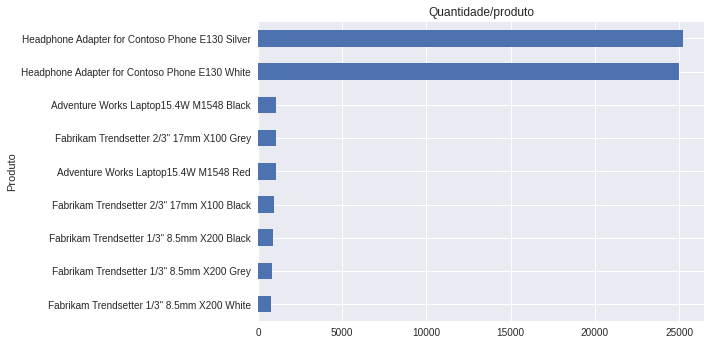

In [ ]:
df_produto_lucro.groupby(df_produto_lucro['Produto'])['Quantidade'].sum().sort_values(ascending=True).plot.barh(title = 'Quantidade/produto')
plt.xlabel = ('Quantidade')
plt.ylabel = ('Produto');

In [ ]:
df_2008 = df.loc[(df['Data Venda'].dt.year == 2008)]
df_2008_produto_quantidade = df_2008[['Produto', 'Quantidade', 'Lucro']]
df_2009 = df.loc[(df['Data Venda'].dt.year == 2009)]
df_2009_produto_quantidade = df_2009[['Produto', 'Quantidade', 'Lucro']]

In [ ]:
quantidade_ano = df.groupby(['Produto', df['Data Venda'].dt.year])['Quantidade'].sum().reset_index()
quantidade_ano

,Produto,Data Venda,Quantidade
0,Adventure Works Laptop15.4W M1548 Black,2008,456
1,Adventure Works Laptop15.4W M1548 Black,2009,633
2,Adventure Works Laptop15.4W M1548 Red,2008,452
3,Adventure Works Laptop15.4W M1548 Red,2009,595
4,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,2008,582
5,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,2009,302
6,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,2008,548
7,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,2009,297
8,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,2008,394
9,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,2009,395


In [ ]:
lucro_ano = df.groupby(['Produto', df['Data Venda'].dt.year])['Lucro'].sum().reset_index()
lucro_ano

,Produto,Data Venda,Lucro
0,Adventure Works Laptop15.4W M1548 Black,2008,"116,140.88"
1,Adventure Works Laptop15.4W M1548 Black,2009,"172,371.86"
2,Adventure Works Laptop15.4W M1548 Red,2008,"125,388.08"
3,Adventure Works Laptop15.4W M1548 Red,2009,"135,650.54"
4,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,2008,"294,316.38"
5,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,2009,"129,591.24"
6,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,2008,"305,922.12"
7,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,2009,"134,028.58"
8,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,2008,"201,355.36"
9,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,2009,"178,390.06"


In [ ]:
produtos = lucro_ano.loc[(lucro_ano['Data Venda'] == 2008)]['Produto']
lucro_2008 = lucro_ano.loc[(lucro_ano['Data Venda'] == 2008)]['Lucro']
lucro_2009 = lucro_ano.loc[(lucro_ano['Data Venda'] == 2009)]['Lucro']

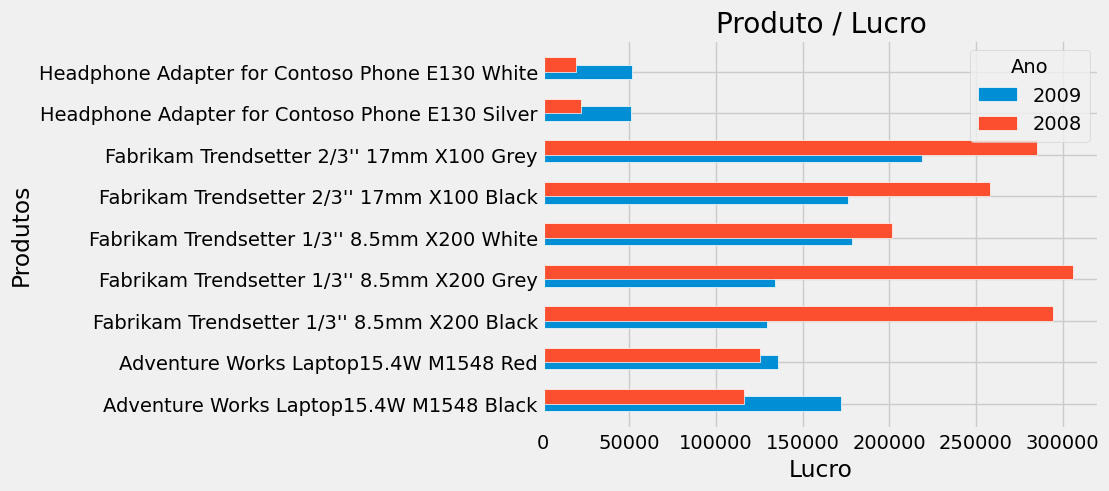

In [301]:
produtos_graph = list(produtos.values)
counts1 = list(lucro_2008.values)
counts2 = list(lucro_2009.values)

x = np.arange(len(produtos_graph))
width = 0.35 

fig, ax = plt.subplots()
plt.style.use('fivethirtyeight')

ax.barh(produtos_graph, counts2, width, align='center', label='2009', edgecolor = 'w')
ax.barh(produtos_graph, counts1, width, align='edge', label='2008', edgecolor = 'w')
ax.legend(title='Ano', loc = 'upper right')


ax.set_ylabel('Produtos')
ax.set_xlabel('Lucro')
ax.set_title('Produto / Lucro')


plt.show()


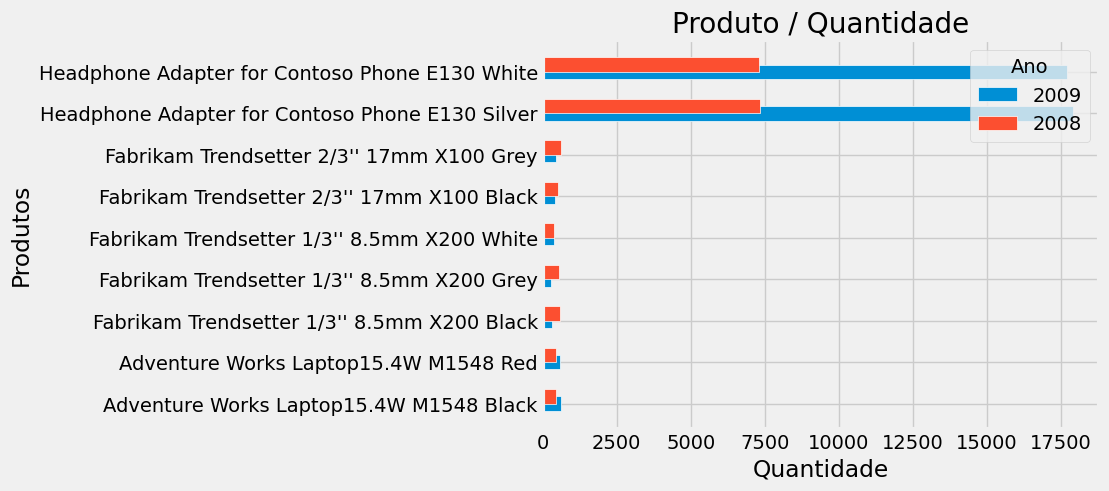

In [302]:
#quantidade_ano = df.groupby(['Produto', df['Data Venda'].dt.year])['Quantidade'].sum().reset_index()
#quantidade_ano

produtos = quantidade_ano.loc[(quantidade_ano['Data Venda'] == 2008)]['Produto']
quantidade_2008 = quantidade_ano.loc[(quantidade_ano['Data Venda'] == 2008)]['Quantidade']
quantidade_2009 = quantidade_ano.loc[(quantidade_ano['Data Venda'] == 2009)]['Quantidade']

produtos_graph = list(produtos.values)
counts1 = list(quantidade_2008.values)
counts2 = list(quantidade_2009.values)

x = np.arange(len(produtos_graph))
width = 0.35 

fig, ax = plt.subplots()
plt.style.use('fivethirtyeight')

ax.barh(produtos_graph, counts2, width, align='center', label='2009', edgecolor = 'w')
ax.barh(produtos_graph, counts1, width, align='edge', label='2008', edgecolor = 'w')
ax.legend(title='Ano', loc = 'upper right')


ax.set_ylabel('Produtos')
ax.set_xlabel('Quantidade')
ax.set_title('Produto / Quantidade')


plt.show()